In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.integrate

## 1. 对波士顿马拉松比赛进行抽样
### 1.1 总体分布

In [25]:
def getBMData(filename):
    """读取给定文件内容。假设文件是逗号分隔的形式，每个条目中有6个元素：
    0. 姓名（字符串）， 1. 性别（字符串）， 2. 年龄（整数）， 3. 分组（整数），
    4. 国家（字符串）， 5. 整体时间（浮点数）
    返回一个字典，包含分别由6个变量组成的列表。 """
    
    data = {}
    f = open(filename)
    line = f.readline()
    # print(line)
    data['name'], data['gender'], data['age'] = [], [], []
    data['division'], data['country'], data['time'] = [], [], []
    while line != '':
        split = line.split(",")
        data['name'].append(split[0])
        data['gender'].append(split[1])
        data['age'].append(split[2])
        data['division'].append(int(split[3]))
        data['country'].append(split[4])
        data['time'].append(float(split[5][:-1])) # remove \n
        line = f.readline()
    # print(data)
    f.close()
    return data

In [30]:
def makeHist(data, bins, title, xLabel, yLabel):
    plt.hist(data, bins)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    mean = np.mean(data)
    std = np.std(data)
    plt.annotate('Mean = ' + str(round(mean, 2)) +  '\nSD = ' + str(round(std, 2)), fontsize = 15,
    xy = (0.65, 0.75), xycoords = 'axes fraction')


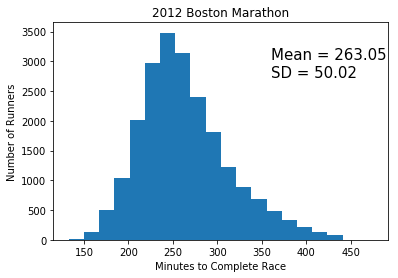

In [31]:
times = getBMData('txt/bm_results2012.txt')['time']
makeHist(times, 20, '2012 Boston Marathon', 'Minutes to Complete Race', 'Number of Runners')

### 1.2 抽样分布

In [35]:
def sampleTimes(times, numExamples):
    sample = random.sample(times, numExamples)
    makeHist(sample, 10, 'Sample of Size ' + str(numExamples), 'Minutes to Complete Race', 'Number of Runners')

- 估算出的均值与总体均值的差别还不到2%
- 大数定律告诉我们，当样本量增加时，样本分布就会与总体分布更加一致。所以样本越大，样本均值和样本标准差更加接近总体均值和总体标准差的可能性就越大

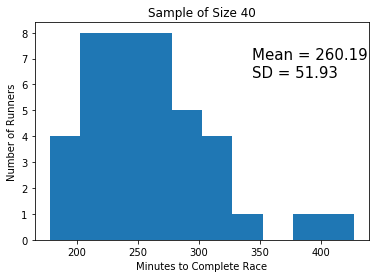

In [39]:
sampleSize = 40
sampleTimes(times, sampleSize)

In [41]:
def gaussian(x, mu, sigma):
    factor1 = (1/(sigma*((2*np.pi)**0.5)))
    factor2 = np.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2

In [42]:
area = round(scipy.integrate.quad(gaussian, -3, 3, (0, 1))[0], 4)
print('Probability of being within 3', 'of true mean of tight dist. =', area)
area = round(scipy.integrate.quad(gaussian, -3, 3, (0, 100))[0], 4)
print('Probability of being within 3', 'of true mean of wide dist. =', area)

Probability of being within 3 of true mean of tight dist. = 0.9973
Probability of being within 3 of true mean of wide dist. = 0.0239


In [44]:
def testSamples(numTrials, sampleSize):
    tightMeans, wideMeans = [], []
    for t in range(numTrials):
        sampleTight, sampleWide = [], []
        for i in range(sampleSize):
            sampleTight.append(random.gauss(0, 1))
            sampleWide.append(random.gauss(0, 100))
        tightMeans.append(np.mean(sampleTight))
        wideMeans.append(np.mean(sampleWide))
    return tightMeans, wideMeans

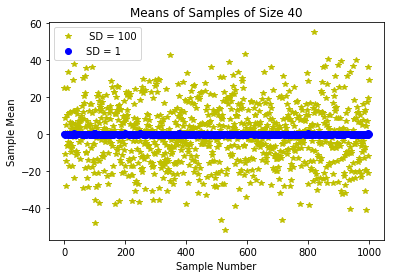

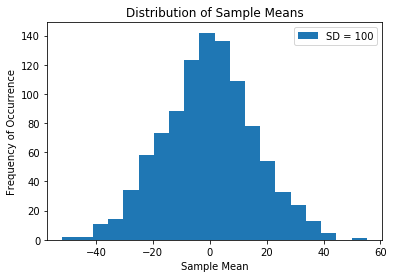

In [45]:
tightMeans, wideMeans = testSamples(1000, 40)
plt.plot(wideMeans, 'y*', label = ' SD = 100')
plt.plot(tightMeans, 'bo', label = 'SD = 1')
plt.xlabel('Sample Number')
plt.ylabel('Sample Mean')
plt.title('Means of Samples of Size ' + str(40))
plt.legend()

plt.figure()
plt.hist(wideMeans, bins = 20, label = 'SD = 100')
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency of Occurrence')
plt.legend()

## 2. 中心极限定理
-  给定一组从同一总体中抽取的足够大的样本，这些样本的均值（样本均值）大致服从正态分布；
-  这个正态分布的均值近似等于总体均值；
-  样本均值的方差（在15.3节中定义）近似等于总体方差除以样本量

In [52]:
def plotMeans(numDicePerTrial, numDiceThrown, numBins, legend, color, style):
    means = []
    numTrials = numDiceThrown//numDicePerTrial
    
    for i in range(numTrials):
        vals = 0
        for j in range(numDicePerTrial):
            vals += 5*random.random()
        means.append(vals/numDicePerTrial)
        
    plt.hist(means, numBins, color = color, label = legend, weights = np.array(len(means)*[1])/len(means), hatch = style)
    return sum(means)/len(means), np.var(means)

Mean of rolling 1 die = 2.4953 Variance = 2.0688
Mean of rolling 100 dice = 2.4945 Variance = 0.0194


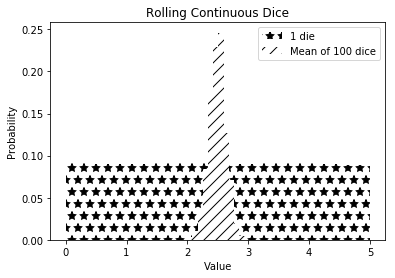

In [53]:
mean, var = plotMeans(1, 100000, 11, '1 die', 'w', '*')
print('Mean of rolling 1 die =', round(mean,4), 'Variance =', round(var,4))
mean, var = plotMeans(100, 100000, 11, 'Mean of 100 dice', 'w', '//')
print('Mean of rolling 100 dice =', round(mean, 4), 'Variance =', round(var, 4))
plt.title('Rolling Continuous Dice')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()

In [55]:
sum(range(6))/6

2.5

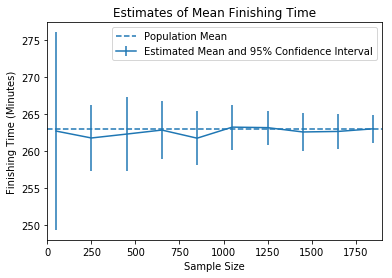

In [60]:
times = getBMData('txt/bm_results2012.txt')['time']
meanOfMeans, stdOfMeans = [], []
sampleSizes = range(50, 2000, 200)
for sampleSize in sampleSizes: 
    sampleMeans = []
    for t in range(20):
        sample = random.sample(times, sampleSize)
        sampleMeans.append(sum(sample)/sampleSize)
    meanOfMeans.append(sum(sampleMeans)/len(sampleMeans))
    stdOfMeans.append(np.std(sampleMeans))
plt.errorbar(sampleSizes, meanOfMeans, yerr = 1.96 * np.array(stdOfMeans), 
               label = 'Estimated Mean and 95% Confidence Interval')
plt.xlim(0, max(sampleSizes) + 50)
plt.axhline(sum(times)/len(times), linestyle = '--', label = "Population Mean")
plt.title("Estimates of Mean Finishing Time")
plt.xlabel("Sample Size")
plt.ylabel("Finishing Time (Minutes)")
plt.legend(loc = 'best')